In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [114]:
image1 = cv2.imread('island.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread('robot.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


In [24]:
sum = image1 // 2 + image2 // 2

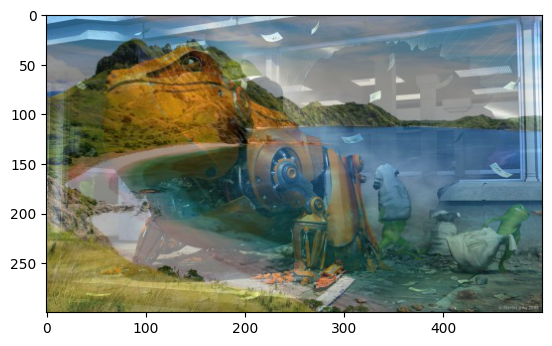

In [25]:
plt.imshow(sum)

In [11]:
def multiply_by_scaler(image, scaler):
    scaled_image = np.multiply(image,scaler)
    scaled_image = np.clip(scaled_image, 0, 255)
    scaled_image = np.round(scaled_image).astype(int)
    return scaled_image

def apply_noise(image, sigma):
    noise = np.random.normal(0,sigma,image.shape)
    noisy_image = (image + noise)
    noisy_image = np.clip(noisy_image, 0, 255)
    noisy_image = np.round(noisy_image).astype(int)
    return noisy_image
def clip_round(image):
    image = np.clip(image, 0, 255)
    image = np.round(image).astype(int)
    return image




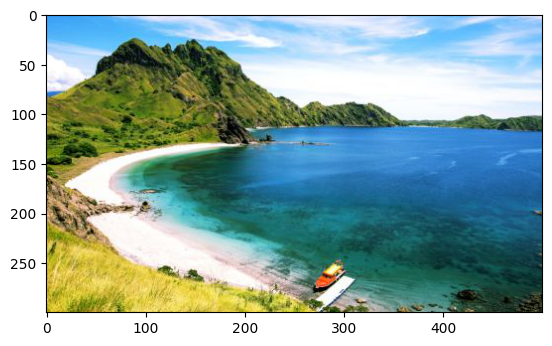

In [68]:
scaled_image = multiply_by_scaler(image1,1)

noisy_image = apply_noise(scaled_image, 0)

plt.imshow(noisy_image)
#plt.imshow(image1)

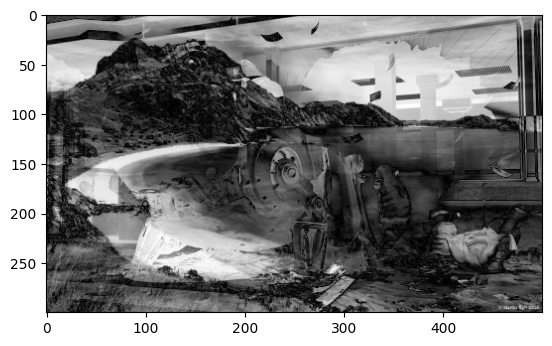

In [115]:
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY).astype(int)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY).astype(int)

#diff = np.clip(gray_image1 - gray_image2, 0, 255) + np.clip(gray_image2 - gray_image1, 0, 255)
diff = cv2.absdiff(gray_image1,gray_image2)
#abs_diff = abs(gray_image1 - gray_image2)
plt.imshow(diff, cmap='gray')

In [107]:
np.clip(gray_image1 - gray_image2, 0, 255)

array([[  0,   0,   0, ..., 207, 205, 206],
       [  0,   0,   0, ..., 197, 189, 184],
       [  0,   0,   0, ..., 134, 132, 128],
       ...,
       [ 61,  44,  41, ...,   0,   0,   0],
       [ 70,  44,  29, ...,   0,   0,   0],
       [ 63,  49,  44, ...,   0,   0,   0]])

In [101]:
gray_image1 - gray_image2

array([[188, 198, 203, ..., 207, 205, 206],
       [194, 189, 191, ..., 197, 189, 184],
       [196, 194, 191, ..., 134, 132, 128],
       ...,
       [ 61,  44,  41, ..., 204, 208, 212],
       [ 70,  44,  29, ..., 197, 186, 201],
       [ 63,  49,  44, ..., 192, 190, 192]], dtype=uint8)

In [102]:
gray_image1[0,0]

170

In [52]:
noise

array([[[ 1.72690535,  0.41529906,  0.46710556],
        [ 0.23505208,  0.08095176, -0.08302821],
        [-0.26887192,  0.47480679, -0.03119486],
        ...,
        [-0.82876695, -0.3515574 ,  0.17741387],
        [ 0.6434765 , -0.66424193,  0.05205076],
        [ 0.43150193, -0.03474895,  0.12388403]],

       [[-0.43955782,  0.33914117, -0.01019738],
        [ 0.47747248, -0.37634148, -0.48479533],
        [ 0.28068777, -1.24376501, -0.1092816 ],
        ...,
        [-0.33909586,  0.51741148,  0.38158137],
        [-0.05852855,  0.06270669, -0.12537572],
        [-0.37378326,  0.33692158, -0.56538757]],

       [[ 0.56637299,  0.50989688,  0.53683408],
        [ 0.73487356,  0.28802541,  1.11194904],
        [-0.71244628,  0.09158469,  0.25836125],
        ...,
        [ 0.16371499,  0.41847906,  0.02139577],
        [-0.61983906, -0.28955799,  0.61551828],
        [ 0.60966381,  0.35709845, -0.45283318]],

       ...,

       [[-0.75200819, -1.01437654, -0.93137349],
        [-0

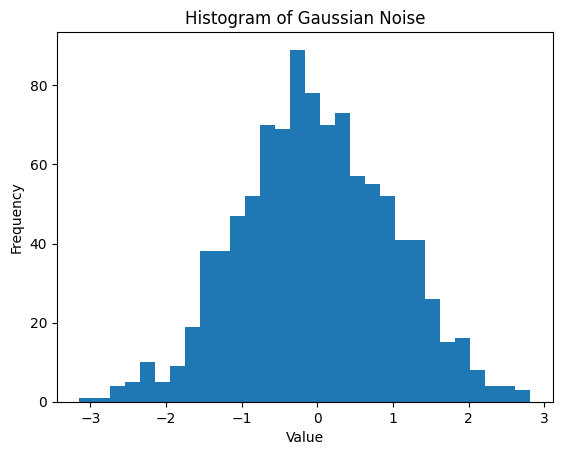

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Generate Gaussian noise
noise = np.random.randn(1000)

# Create the histogram
plt.hist(noise, bins=30)

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Gaussian Noise')

# Display the plot
plt.show()


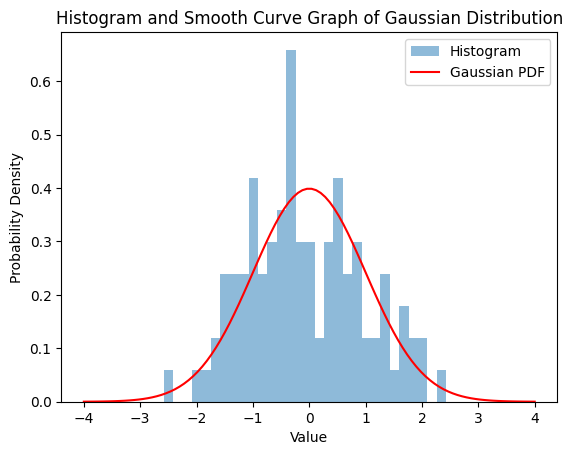

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Gaussian noise
noise = np.random.randn(100)

# Create the histogram
plt.hist(noise, bins=30, density=True, alpha=0.5, label='Histogram')

# Create a range of values for the x-axis
x = np.linspace(-4, 4, 100)

# Compute the probability density function (PDF) of the Gaussian distribution
pdf = (1 / np.sqrt(2  *np.pi))*  np.exp(-0.5  *x**2)

# Plot the smooth curve graph
plt.plot(x, pdf, color='red', label='Gaussian PDF')

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Histogram and Smooth Curve Graph of Gaussian Distribution')

# Display the legend
plt.legend()

# Display the plot
plt.show()

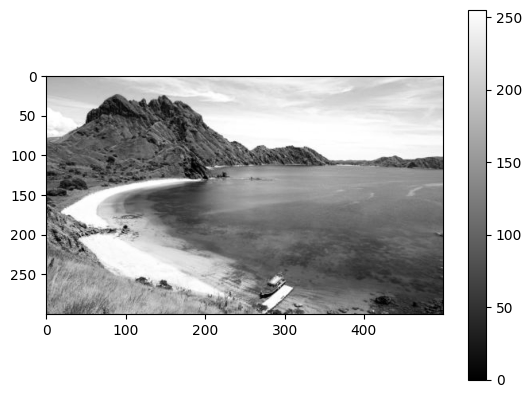

In [132]:


plt.imshow(gray_image1, cmap='gray', vmin=0, vmax=255)
plt.colorbar()  # Add a colorbar for reference
plt.show()

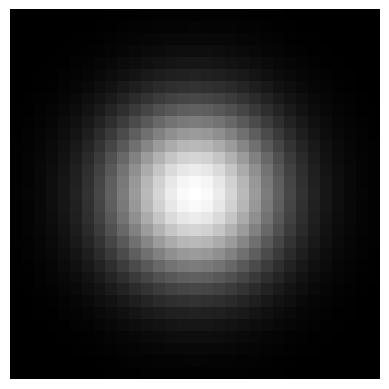

In [7]:
kernel_size = (31, 31)
sigma = 5

gaussian_filter = cv2.getGaussianKernel(kernel_size[0], sigma)
gaussian_filter = np.outer(gaussian_filter, gaussian_filter)

plt.imshow(gaussian_filter, cmap='gray')
plt.axis('off')
plt.show()

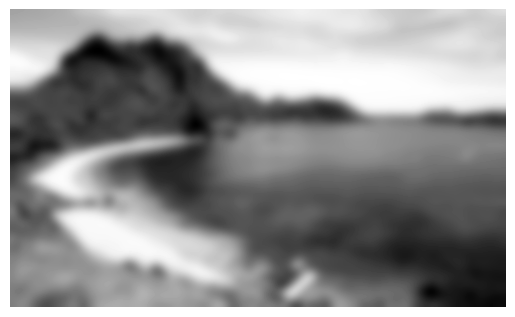

In [8]:
border_size = 100 # Define the size of the border to extend

gray_image_border = gray_image1

kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]], dtype=np.float32)

extended_image = cv2.copyMakeBorder(gray_image_border,
                                    top=border_size,
                                    bottom=border_size,
                                    left=border_size,
                                    right=border_size,
                                    borderType=cv2.BORDER_REFLECT)

filtered_image = cv2.filter2D(extended_image, -1, gaussian_filter)

filtered_image = filtered_image[border_size:-border_size,border_size:-border_size]

plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()


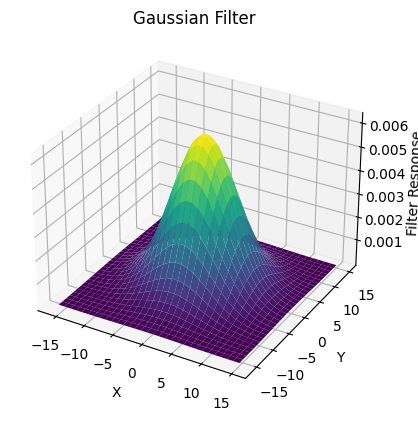

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the size and sigma of the Gaussian filter
size = 31
sigma = 5

# Generate the Gaussian filter
x = np.linspace(-size//2, size//2, size)
y = np.linspace(-size//2, size//2, size)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2) / (2  *sigma**2)) / (2*  np.pi  *sigma**2)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Filter Response')
ax.set_title('Gaussian Filter')

# Show the plot
plt.show()

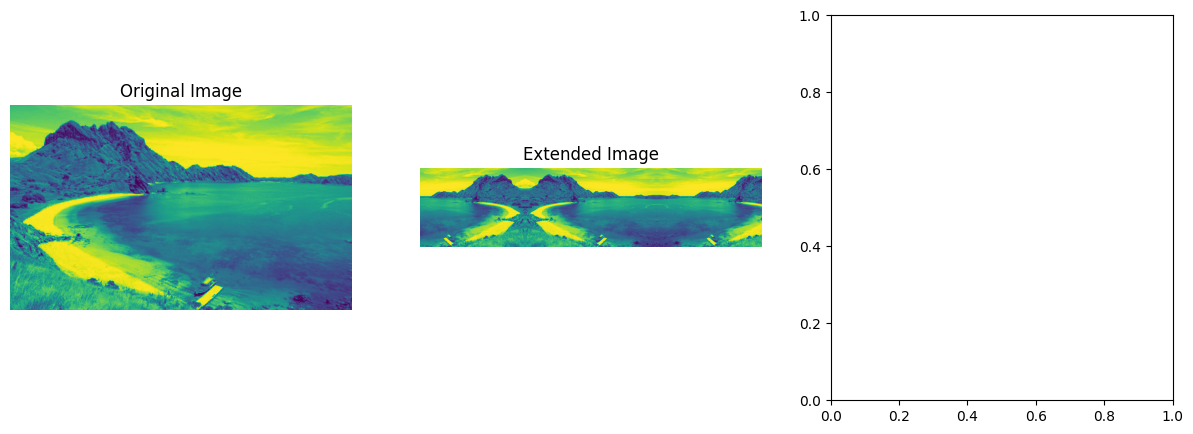

In [151]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = gray_image1

# Convert color from BGR to RGB (OpenCV loads images in BGR format)

# Extend a mirror image of the border


# Apply Gaussian blur filter
kernel_size = (5, 5)  # Kernel size can be adjusted

# Display images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Display original image
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Display extended image
axs[1].imshow(extended_image)
axs[1].set_title('Extended Image')
axs[1].axis('off')


plt.show()


In [27]:
import cv2
import numpy as np

# Load the image
sharp_image = gray_image1
# Define your custom filter
custom_filter_sharp = np.array([[0, 0, 0],
                                [0, 2, 0],
                                [0, 0, 0]])

custom_filter_avg = np.array([[1, 1, 1],
                              [1, 1, 1],
                              [1, 1, 1]])

# Perform filtering
filtered_image_sharp = cv2.filter2D(sharp_image, -1, custom_filter_sharp)

filtered_image_avg = cv2.filter2D(sharp_image, -1, custom_filter_avg)

final_image = clip_round(filtered_image_sharp - (filtered_image_avg/9))

# Display the filtered image
plt.imshow(gray_image1, cmap='gray')
plt.axis('off')
plt.show()

error: OpenCV(4.6.0) /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/imgproc/src/filter.simd.hpp:3297: error: (-213:The function/feature is not implemented) Unsupported combination of source format (=4), and destination format (=4) in function 'getLinearFilter'


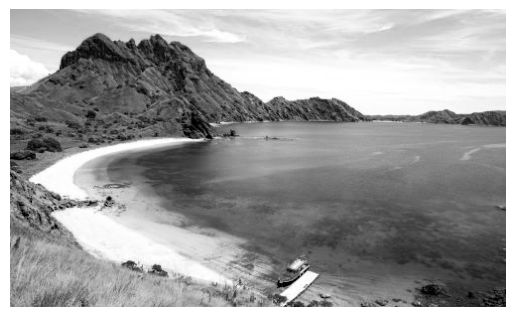

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming image1 is your loaded image and it's in color
# Convert to grayscale
gray_image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Define your custom filter
custom_filter_sharp = np.array([[0, 0, 0],
                                [0, 1, 0],
                                [0, 0, 0]])

custom_filter_avg = np.array([[1, 1, 1],
                              [1, -18, 1],
                              [1, 1, 1]])  # Normalize it

# Perform filtering
filtered_image_sharp = cv2.filter2D(gray_image, -1, custom_filter_sharp)
filtered_image_avg = cv2.filter2D(gray_image, -1, custom_filter_avg)

# Assuming clip_round function is correctly implemented
final_image = clip_round(filtered_image_sharp - (filtered_image_avg/9))

# Display the filtered image
plt.imshow(final_image, cmap='gray')
plt.axis('off')
plt.show()


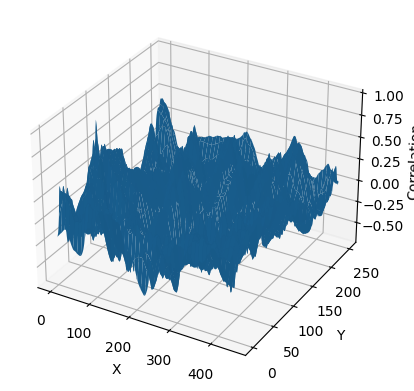

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Load the image
image = cv2.imread('robot.jpg', cv2.IMREAD_GRAYSCALE)  # Grayscale for simplicity

if image is None:
    print("Image not found!")
    exit()

# 2. Choose a small subset of the image to be used as the filter
filter_subset = image[50:100, 50:100]  # Adjust these coordinates to your needs

# 3. Perform normalized correlation
result = cv2.matchTemplate(image, filter_subset, cv2.TM_CCOEFF_NORMED)

# 4. Create a 3D graph
x, y = np.meshgrid(range(result.shape[1]), range(result.shape[0]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, result)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Correlation')

plt.show()

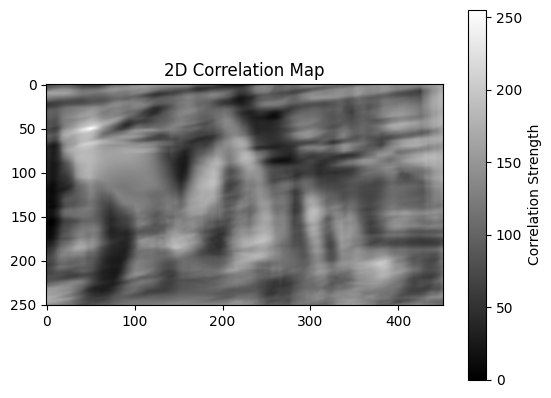

In [58]:
# Normalize the result matrix to fit the 0-255 range for visualization
normalized_result = cv2.normalize(result, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Display the 2D correlation map
plt.imshow(normalized_result, cmap='gray')
plt.title("2D Correlation Map")
plt.colorbar(label="Correlation Strength")
plt.show()


In [54]:
result.shape

(101, 301)

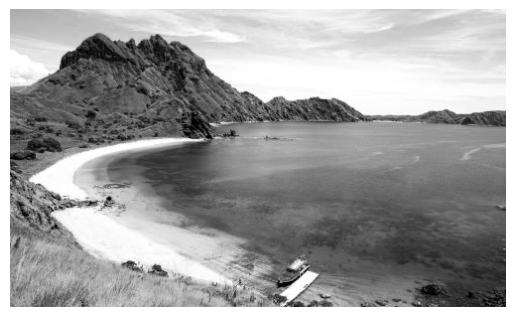

In [40]:
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

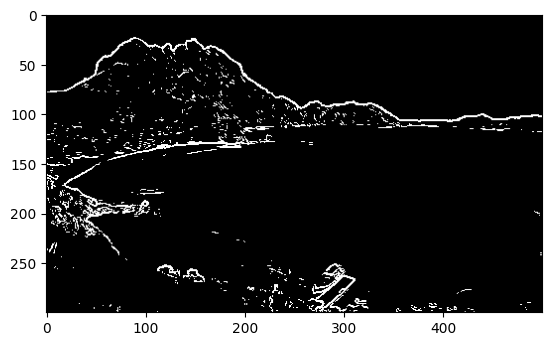

In [78]:
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

sobel_x_squared = sobel_x ** 2
sobel_y_squared = sobel_y ** 2

sobel_sum = sobel_x_squared + sobel_y_squared

edges = clip_round(np.sqrt(sobel_sum))

threshold_value = 255  # Adjust this value to control the threshold
edges[edges < threshold_value] = 0

plt.imshow(edges, cmap='gray')
plt.show()

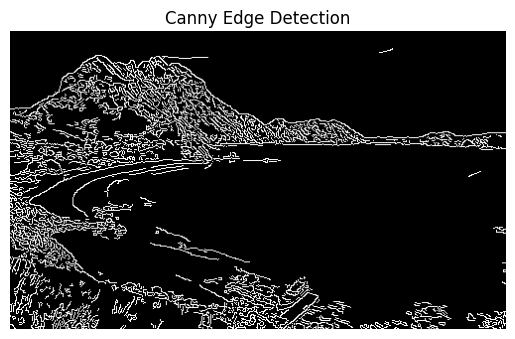

In [106]:
# Import necessary modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image (assuming it's in the same directory as the notebook)
image_path = "isl" # Replace this with your image path
image = gray_image

# Step 1: Apply a smoothing derivative (Gaussian blur)
smoothed_image = cv2.GaussianBlur(image, (5, 5), 1)

# Calculate gradient (Sobel operator)
Gx = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(Gx ** 2 + Gy ** 2)
angle = np.arctan2(Gy, Gx) * (180 / np.pi) % 180

# Non-maximum suppression
non_max_image = np.zeros_like(smoothed_image, dtype=np.float32)
for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
        angle_ = angle[i, j]
        if (0 <= angle_ < 22.5) or (157.5 <= angle_ <= 180):
            neighbors = [magnitude[i, j+1], magnitude[i, j-1]]
        elif 22.5 <= angle_ < 67.5:
            neighbors = [magnitude[i+1, j-1], magnitude[i-1, j+1]]
        elif 67.5 <= angle_ < 112.5:
            neighbors = [magnitude[i+1, j], magnitude[i-1, j]]
        else:
            neighbors = [magnitude[i-1, j-1], magnitude[i+1, j+1]]

        if magnitude[i, j] >= max(neighbors):
            non_max_image[i, j] = magnitude[i, j]

# Step 2 & 3: Thresholding
strong_thresh = 90
weak_thresh = 50
strong_pixel = 255
weak_pixel = 100

strong_indices = np.where(non_max_image >= strong_thresh)
zero_indices = np.where(non_max_image < weak_thresh)
weak_indices = np.where((non_max_image <= strong_thresh) & (non_max_image >= weak_thresh))

non_max_image[strong_indices] = strong_pixel
non_max_image[zero_indices] = 0
non_max_image[weak_indices] = weak_pixel

# Connect strong pixels with weak pixels
for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
        if non_max_image[i, j] == weak_pixel:
            if np.any(non_max_image[i-1:i+2, j-1:j+2] == strong_pixel):
                non_max_image[i, j] = strong_pixel
            else:
                non_max_image[i, j] = 0

edges = cv2.Canny(gray_image,100,200)

# Step 4: Display the image using matplotlib (since we're in a Jupyter notebook)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


In [113]:
gray_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(-0.5, 499.5, 299.5, -0.5)

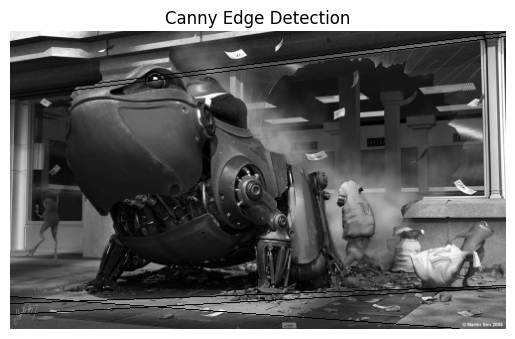

In [130]:
gray_image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


# Step 1: Edge Detection using Canny
edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# Step 2: Hough Transform
# cv2.HoughLines(image, rho, theta, threshold)
# image: should be the output of a Canny transform.
# rho: Resolution of the accumulator in pixels.
# theta: Angle resolution of the accumulator in radians.
# threshold: Accumulator threshold parameter. Only those lines are returned that get enough votes (> `threshold`).

lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

if lines is not None:
    # Take the top 5 lines based on the accumulator value
    top_lines = lines[:5]

    # Step 3: Draw Lines on the original image
    for line in top_lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(gray_image, (x1, y1), (x2, y2), (0, 0, 255), 1)


# Show the result
plt.imshow(gray_image, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

Peak 1: Rho = 0, Theta = 58
Peak 2: Rho = -267, Theta = 86
Peak 3: Rho = 0, Theta = 62
Peak 4: Rho = 0, Theta = 64
Peak 5: Rho = -62, Theta = 97


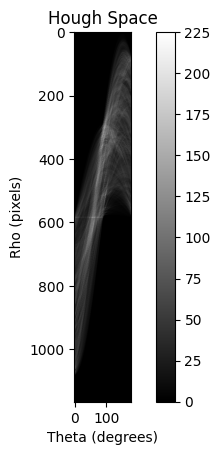

In [136]:
gray_image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Edge detection using Canny
edges = cv2.Canny(gray_image, 50, 150)

# Initialize the accumulator
theta_max = 180  # Range from 0 to 180 degrees
rho_max = int(np.sqrt(gray_image.shape[0]**2 + gray_image.shape[1]**2))
accumulator = np.zeros((2 * rho_max, theta_max), dtype=int)  # For both negative and positive rho values

# Compute the accumulator
for y in range(edges.shape[0]):
    for x in range(edges.shape[1]):
        if edges[y, x]:
            for theta in range(theta_max):
                theta_rad = np.deg2rad(theta)
                rho = int(x * np.cos(theta_rad) - y * np.sin(theta_rad))
                accumulator[rho + rho_max, theta] += 1  # Adjust index for negative rho values

# Find the top 5 peaks
flattened_accumulator = accumulator.flatten()
sorted_indices = np.argsort(flattened_accumulator)[::-1][:5]
top_peaks = np.unravel_index(sorted_indices, accumulator.shape)

# Print out the top 5 peaks
for i in range(5):
    rho, theta = top_peaks[0][i] - rho_max, top_peaks[1][i]  # Adjust index back for actual rho value
    print(f"Peak {i+1}: Rho = {rho}, Theta = {theta}")

# Visualize the accumulator
plt.imshow(accumulator, cmap='gray')
plt.title("Hough Space")
plt.xlabel("Theta (degrees)")
plt.ylabel("Rho (pixels)")
plt.colorbar()
plt.show()

In [134]:
flattened_accumulator = accumulator.flatten()
sorted_indices = np.argsort(flattened_accumulator)[::-1][:5]  # Sort and take top 5
top_peaks = np.unravel_index(sorted_indices, accumulator.shape)  # Convert to 2D indices


for i in range(5):
    rho, theta = top_peaks[0][i], top_peaks[1][i]
    print(f"Peak {i+1}: Rho = {rho}, Theta = {theta}")

Peak 1: Rho = 0, Theta = 482
Peak 2: Rho = 0, Theta = 302
Peak 3: Rho = 0, Theta = 122
Peak 4: Rho = 267, Theta = 454
Peak 5: Rho = 267, Theta = 94


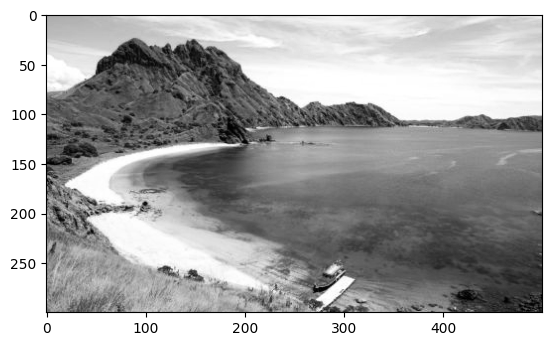

In [122]:
gray_image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
